In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
for message_number, message in enumerate(messages[:10]):
    print(message_number, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

In [7]:
df_messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [8]:
df_messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [10]:
df_messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df_messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
df_messages['lenght'] = df_messages['message'].apply(len)

In [13]:
df_messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Visualizando os dados

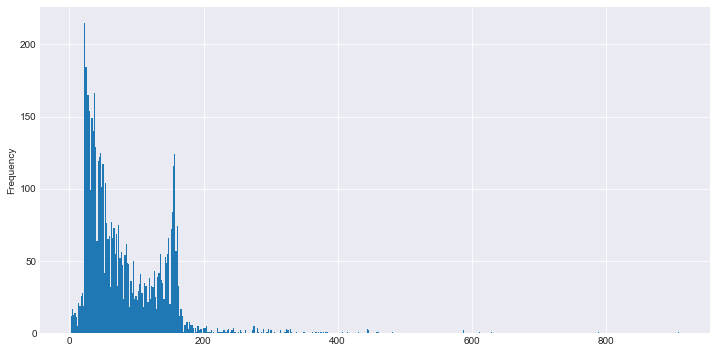

In [14]:
plt.figure(figsize=(12, 6))
df_messages['lenght'].plot(kind='hist', bins=500)

In [15]:
df_messages.lenght.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [16]:
df_messages[df_messages['lenght']==910]

,label,message,lenght
1085,ham,For me the love should start with attraction.i...,910


In [17]:
df_messages[df_messages['lenght']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000FBB29E0160>,
      dtype=object)

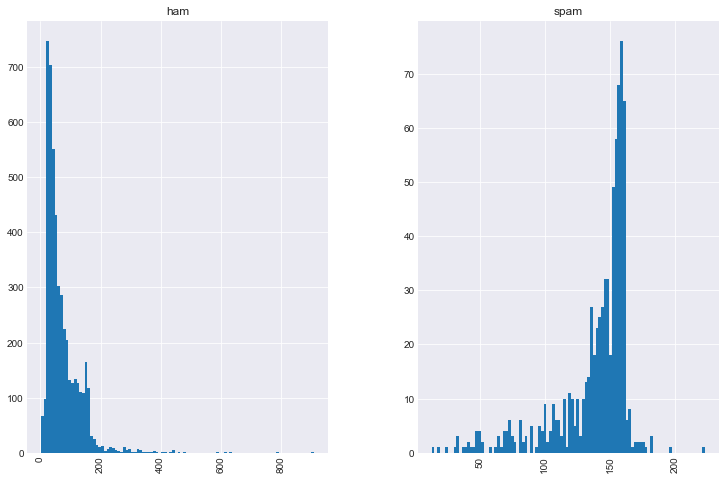

In [18]:
df_messages.hist(bins=100, column='lenght', by='label', figsize=(12, 8))

### Alguns exemplos usando a lib String

In [19]:
import string

In [20]:
mess = 'Exemplo message! Note: She has a score.'

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# Aqui devolve um array de strings
notepont = [car for car in mess if car not in string.punctuation]

In [23]:
# Vamos transformar pra string novamente
notepont = ''.join(notepont)

In [24]:
notepont # Note que a voltou a ser string e sem nenhum acento

'Exemplo message Note She has a score'

### Agora iremos utilizar a lib ntkl

In [25]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
tst = 'Sample message! Notice: is has punctuation.'

In [27]:
clean_mess = [word for word in tst.split() if word.lower() not in stopwords.words('english')]

In [28]:
clean_mess # is and has disappeared

['Sample', 'message!', 'Notice:', 'punctuation.']

In [29]:
def text_process(msg):
    # Retirar as pontuações
    nopunc = [char for char in msg if char not in string.punctuation]
    
    # Juntar para formar novamente as strings
    nopunc = ''.join(nopunc)
    
    # Remover os stopwords
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return sms

In [30]:
df_messages['message'].apply(text_process).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [31]:
df_messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Preparando os dados para realizar o modelo de ML

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_messages['message'])

In [34]:
print(len(bow_transformer.vocabulary_))

11425


In [35]:
message4 = df_messages['message'][3]

In [36]:
message4

'U dun say so early hor... U c already then say...'

In [37]:
bow4 = bow_transformer.transform([message4])

In [38]:
print(bow4)
print()
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2

(1, 11425)


In [39]:
print(bow_transformer.get_feature_names()[4068])

U


In [40]:
messages_bow = bow_transformer.transform(df_messages['message'])

In [41]:
print(messages_bow.shape)
print(messages_bow.nnz)

(5572, 11425)
50548


In [42]:
sparsy = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsy: {}'.format(sparsy))

sparsy: 0.07940295412668218


### Utilizando o Tf-idf

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

In [44]:
tfidf_transformer = TfidfTransformer()

In [45]:
tfidf_transformer = tfidf_transformer.fit(messages_bow)

In [46]:
tfidf4 = tfidf_transformer.transform(bow4)

In [47]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [48]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


### Modelo de ML

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

**Não é coveniente usar todos os dados para o treino, temos que dividir em dados de train e teste, neste exemplo, foi apenas para fins didáticos.**

In [53]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, df_messages['label'])

In [56]:
print('Predito: {}'.format(spam_detect_model.predict(tfidf4)[0]))
print('Esperado: {}'.format(df_messages['label'][3]))

Predito: ham
Esperado: ham


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
msg_train, msg_test, label_train, label_test = train_test_split(df_messages['message'], df_messages['label'], test_size=0.2)

### Utilizando a lib Pipeline

In [59]:
from sklearn.pipeline import Pipeline

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    #('classifier', MultinomialNB())
    ('classifier', RandomForestClassifier()) # utilizando florestas aleatórias
])

In [82]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000FBB27451E0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [83]:
pred = pipeline.predict(msg_test)

### Agora veremos como está o desempenho do modelo

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
# classification_report(o esperado, o que se espera)
print(classification_report(label_test, pred))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98       954
       spam       1.00      0.71      0.83       161

avg / total       0.96      0.96      0.96      1115



In [86]:
print(confusion_matrix(label_test, pred))

[[954   0]
 [ 46 115]]
